In [19]:
import requests
import re
from bs4 import BeautifulSoup as bs
import pandas as pd
import datetime as dt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [20]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
int_data = pd.read_csv('drive/My Drive/results.csv')

In [ ]:
import numpy as np
winner = []
for i in range (len(int_data['home_team'])):
    if int_data['home_score'][i] > int_data['away_score'][i]:
        winner.append(int_data['home_team'][i])
    elif int_data['home_score'][i] < int_data ['away_score'][i]:
        winner.append(int_data['away_team'][i])
    else:
        winner.append('Draw')
int_data['winning_team'] = winner

#adding goal difference column
int_data['goal_difference'] = np.absolute(int_data['home_score'] - int_data['away_score'])

int_data['is_stake'] = int_data['tournament'] != 'Friendly'
int_data['is_stake'] = int_data['is_stake'].astype(int)

int_data.tail(50)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference,is_stake
47329,2024-06-24,Brazil,Costa Rica,NaN,NaN,Copa América,Inglewood,United States,True,Draw,NaN,1
47330,2024-06-25,England,Slovenia,NaN,NaN,UEFA Euro,Cologne,Germany,True,Draw,NaN,1
47331,2024-06-25,Denmark,Serbia,NaN,NaN,UEFA Euro,Munich,Germany,True,Draw,NaN,1
47332,2024-06-25,Netherlands,Austria,NaN,NaN,UEFA Euro,Berlin,Germany,True,Draw,NaN,1
47333,2024-06-25,France,Poland,NaN,NaN,UEFA Euro,Dortmund,Germany,True,Draw,NaN,1
47334,2024-06-25,Peru,Canada,NaN,NaN,Copa América,Kansas City,United States,True,Draw,NaN,1
47335,2024-06-25,Chile,Argentina,NaN,NaN,Copa América,East Rutherford,United States,True,Draw,NaN,1
47336,2024-06-26,Slovakia,Romania,NaN,NaN,UEFA Euro,Frankfurt,Germany,True,Draw,NaN,1
47337,2024-06-26,Ukraine,Belgium,NaN,NaN,UEFA Euro,Stuttgart,Germany,True,Draw,NaN,1
47338,2024-06-26,Georgia,Portugal,NaN,NaN,UEFA Euro,Gelsenkirchen,Germany,True,Draw,NaN,1


In [ ]:
def result_finder(home, away):
    if home > away:
        return pd.Series([0, 3, 0])
    if home < away:
        return pd.Series([1, 0, 3])
    else:
        return pd.Series([2, 1, 1])

results = int_data.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

In [ ]:
int_data[["result", "home_team_points", "away_team_points"]] = results

In [ ]:
int_data["date"]=pd.to_datetime(int_data.date)
int_data = int_data[int_data.date>=pd.to_datetime("2001-01-01")]

In [ ]:
fifa_ranking = pd.read_csv('drive/My Drive/fifa_ranking-2024-04-04.csv')
fifa_ranking["rank_date"]=pd.to_datetime(fifa_ranking.rank_date)
fifa_ranking = fifa_ranking[fifa_ranking.rank_date>=pd.to_datetime("2000-01-01")]
fifa_ranking.head(4)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
12570,161.0,British Virgin Islands,VGB,141.0,141.0,0,CONCACAF,2000-01-19
12571,160.0,Mauritania,MTN,145.0,145.0,0,CAF,2000-01-19
12572,159.0,Kyrgyz Republic,KGZ,147.0,147.0,0,AFC,2000-01-19
12573,154.0,Lesotho,LES,170.0,170.0,0,CAF,2000-01-19


In [ ]:
int_data =  int_data.replace({'Germany DR': 'Germany', 'China': 'China PR',
                              'IR Iran': 'Iran', 'South Korea': 'Korea Republic',
                              'United States': 'USA'})
int_data['date'] = pd.to_datetime(int_data['date'])

In [ ]:
fifa_ranking =  fifa_ranking.replace({'Czechia': 'Czech Republic'})

In [ ]:
fifa_ranking = fifa_ranking.set_index(['rank_date'])\
            .groupby(['country_full'], group_keys=False)\
            .resample('D').first()\
            .fillna(method='ffill')\
            .reset_index()

In [ ]:
int_data = int_data.merge(fifa_ranking,
                        left_on=['date', 'home_team'],
                        right_on=['rank_date', 'country_full'])
int_data = int_data.merge(fifa_ranking,
                        left_on=['date', 'away_team'],
                        right_on=['rank_date', 'country_full'],
                        suffixes=('_home', '_away'))

In [ ]:
int_data["home_points_by_rank"] = int_data["total_points_home"]/int_data["rank_away"]
int_data["away_points_by_rank"] = int_data["total_points_away"]/int_data["rank_home"]

In [ ]:
#nú þarf ég að gera shift data og bæta við ewm
#gameid
int_data.insert(0, 'GameId', range(1, len(int_data)+1))

In [ ]:
print(int_data.columns.values)

['GameId' 'date' 'home_team' 'away_team' 'home_score' 'away_score'
 'tournament' 'city' 'country' 'neutral' 'winning_team' 'goal_difference'
 'is_stake' 'result' 'home_team_points' 'away_team_points'
 'rank_date_home' 'rank_home' 'country_full_home' 'country_abrv_home'
 'total_points_home' 'previous_points_home' 'rank_change_home'
 'confederation_home' 'rank_date_away' 'rank_away' 'country_full_away'
 'country_abrv_away' 'total_points_away' 'previous_points_away'
 'rank_change_away' 'confederation_away' 'home_points_by_rank'
 'away_points_by_rank']


In [ ]:
cols = ['GameId', 'date','away_team', 'away_score', 'home_score', 'rank_away', 'total_points_away',
        'away_points_by_rank', 'is_stake']
#Away = df_final(columns = cols)
Away = int_data.filter(cols, axis=1)

In [ ]:
cols = ['GameId', 'date','home_team','home_score', 'away_score', 'rank_home', 'total_points_home',
        'home_points_by_rank', 'is_stake']
#home = df_final(columns = cols)
Home = int_data.filter(cols, axis=1)

In [ ]:
Home.columns = ['GameId','date','team','scored', 'conceded', 'rank', 'total_points', 'points_by_rank', 'is_stake']

Away.columns = ['GameId','date','team','scored', 'conceded', 'rank', 'total_points', 'points_by_rank', 'is_stake']

In [ ]:
int_data.head()

,GameId,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference,is_stake,result,home_team_points,away_team_points,rank_date_home,rank_home,country_full_home,country_abrv_home,total_points_home,previous_points_home,rank_change_home,confederation_home,rank_date_away,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away,home_points_by_rank,away_points_by_rank
0,1,2001-01-04,Kenya,Zambia,2.0,1.0,Friendly,Nairobi,Kenya,False,Kenya,1.0,0,0,3,0,2001-01-04,108.0,Kenya,KEN,390.0,393.0,2.0,CAF,2001-01-04,49.0,Zambia,ZAM,555.0,558.0,2.0,CAF,7.959184,5.138889
1,2,2001-01-06,Costa Rica,Guatemala,5.0,2.0,FIFA World Cup qualification,Miami,USA,True,Costa Rica,3.0,1,0,3,0,2001-01-06,60.0,Costa Rica,CRC,528.0,531.0,4.0,CONCACAF,2001-01-06,56.0,Guatemala,GUA,532.0,521.0,-5.0,CONCACAF,9.428571,8.866667
2,3,2001-01-06,Egypt,United Arab Emirates,2.0,1.0,Friendly,Cairo,Egypt,False,Egypt,1.0,0,0,3,0,2001-01-06,33.0,Egypt,EGY,589.0,589.0,1.0,CAF,2001-01-06,64.0,United Arab Emirates,UAE,512.0,525.0,4.0,AFC,9.203125,15.515152
3,4,2001-01-06,Eswatini,Angola,1.0,0.0,Friendly,Manzini,Swaziland,False,Eswatini,1.0,0,0,3,0,2001-01-06,137.0,Eswatini,SWZ,269.0,269.0,2.0,CAF,2001-01-06,55.0,Angola,ANG,539.0,539.0,2.0,CAF,4.890909,3.934307
4,5,2001-01-07,Angola,Lesotho,2.0,0.0,Friendly,Manzini,Swaziland,True,Angola,2.0,0,0,3,0,2001-01-07,55.0,Angola,ANG,539.0,539.0,2.0,CAF,2001-01-07,136.0,Lesotho,LES,272.0,260.0,-2.0,CAF,3.963235,4.945455


In [ ]:
int_df = pd.concat([Home,Away]).sort_values(by='GameId').reset_index(drop=True)
int_df.head()

,GameId,date,team,scored,conceded,rank,total_points,points_by_rank,is_stake
0,1,2001-01-04,Kenya,2.0,1.0,108.0,390.0,7.959184,0
1,1,2001-01-04,Zambia,1.0,2.0,49.0,555.0,5.138889,0
2,2,2001-01-06,Guatemala,2.0,5.0,56.0,532.0,8.866667,1
3,2,2001-01-06,Costa Rica,5.0,2.0,60.0,528.0,9.428571,1
4,3,2001-01-06,Egypt,2.0,1.0,33.0,589.0,9.203125,0


In [ ]:
#drop na
int_df = int_df.dropna()

In [ ]:
#rolling mean eða ewm?
int_cols = ['scored', 'conceded', 'rank', 'points_by_rank']

for s in int_cols:
    int_df[s+'_rolling'] = int_df.groupby('team')[s].transform(lambda x:x.rolling(10).mean())
int_df.tail()

,GameId,date,team,scored,conceded,rank,total_points,points_by_rank,is_stake,scored_rolling,conceded_rolling,rank_rolling,points_by_rank_rolling
36995,18498,2024-03-26,Eswatini,2.0,2.0,149.0,1045.88,5.282222,1,0.9,1.1,146.0,10.347382
36996,18499,2024-03-26,Chad,2.0,1.0,181.0,920.37,5.199831,1,0.5,1.8,178.8,10.630677
36997,18499,2024-03-26,Mauritius,1.0,2.0,177.0,944.95,5.220718,1,0.6,1.0,178.8,8.355204
36998,18500,2024-03-26,Tonga,0.0,1.0,196.0,856.18,4.628000,1,1.0,4.8,199.4,3.860166
36999,18500,2024-03-26,Cook Islands,1.0,0.0,185.0,897.30,4.578061,1,0.4,3.2,188.1,4.738018


In [ ]:
int_cols = ['scored', 'conceded', 'rank', 'points_by_rank']

for s in int_cols:
    int_df[s+'_ewm'] = int_df.groupby('team')[s].transform(lambda x:x.ewm(span=15).mean())
#ideally ewn fyrir ár í senn, times í ewm pandas docs?
int_df.tail()

,GameId,date,team,scored,conceded,rank,total_points,points_by_rank,is_stake,scored_rolling,conceded_rolling,rank_rolling,points_by_rank_rolling,scored_ewm,conceded_ewm,rank_ewm,points_by_rank_ewm
36995,18498,2024-03-26,Eswatini,2.0,2.0,149.0,1045.88,5.282222,1,0.9,1.1,146.0,10.347382,1.157726,1.095525,146.217575,11.410716
36996,18499,2024-03-26,Chad,2.0,1.0,181.0,920.37,5.199831,1,0.5,1.8,178.8,10.630677,0.659690,1.658671,175.286710,8.928860
36997,18499,2024-03-26,Mauritius,1.0,2.0,177.0,944.95,5.220718,1,0.6,1.0,178.8,8.355204,0.649308,1.154499,176.618906,7.774410
36998,18500,2024-03-26,Tonga,0.0,1.0,196.0,856.18,4.628000,1,1.0,4.8,199.4,3.860166,1.020072,4.086296,197.906620,3.198986
36999,18500,2024-03-26,Cook Islands,1.0,0.0,185.0,897.30,4.578061,1,0.4,3.2,188.1,4.738018,0.576489,2.656596,189.574865,3.671933


In [ ]:
#shift score
int_cols = ['scored_rolling', 'conceded_rolling', 'rank_rolling',
            'points_by_rank_rolling', 'scored_ewm', 'conceded_ewm',
            'rank_ewm', 'points_by_rank_ewm']
int_df = int_df.sort_values(by='GameId').reset_index(drop=True)
for s in int_cols:
    int_df[s] = int_df.groupby('team')[s].shift(1)

In [ ]:
#drop na eftir shift
int_df = int_df.dropna()

In [ ]:
int_df.head()

,GameId,date,team,scored,conceded,rank,total_points,points_by_rank,is_stake,scored_rolling,conceded_rolling,rank_rolling,points_by_rank_rolling,scored_ewm,conceded_ewm,rank_ewm,points_by_rank_ewm
436,219,2001-03-25,Qatar,3.0,0.0,86.0,459.0,3.672000,1,1.6,0.7,97.4,5.885213,1.632521,0.681587,95.649370,5.194684
676,339,2001-04-26,Egypt,1.0,2.0,34.0,589.0,14.365854,0,2.1,1.0,32.7,9.262234,2.109374,1.122430,32.893305,8.908675
720,361,2001-05-06,Egypt,1.0,0.0,34.0,589.0,7.271605,1,2.0,1.1,32.8,9.778507,1.929236,1.264928,33.073008,9.794800
728,365,2001-05-07,Oman,7.0,0.0,100.0,422.0,2.331492,1,3.1,0.7,103.1,4.017237,3.922229,0.518633,102.064207,3.641416
739,370,2001-05-11,Oman,2.0,0.0,100.0,422.0,2.331492,1,3.7,0.5,102.4,3.595386,4.421991,0.434418,101.729025,3.428713


In [ ]:
int_df_main = pd.concat(
    [
        int_df.iloc[::2].reset_index(drop=True),
        int_df.iloc[1::2].reset_index(drop=True)
    ], axis=1
)
int_df_main

,GameId,date,team,scored,conceded,rank,total_points,points_by_rank,is_stake,scored_rolling,conceded_rolling,rank_rolling,points_by_rank_rolling,scored_ewm,conceded_ewm,rank_ewm,points_by_rank_ewm,GameId,date,team,scored,conceded,rank,total_points,points_by_rank,is_stake,scored_rolling,conceded_rolling,rank_rolling,points_by_rank_rolling,scored_ewm,conceded_ewm,rank_ewm,points_by_rank_ewm
0,219,2001-03-25,Qatar,3.0,0.0,86.0,459.00,3.672000,1,1.6,0.7,97.4,5.885213,1.632521,0.681587,95.649370,5.194684,339,2001-04-26,Egypt,1.0,2.0,34.0,589.00,14.365854,0,2.1,1.0,32.7,9.262234,2.109374,1.122430,32.893305,8.908675
1,361,2001-05-06,Egypt,1.0,0.0,34.0,589.00,7.271605,1,2.0,1.1,32.8,9.778507,1.929236,1.264928,33.073008,9.794800,365,2001-05-07,Oman,7.0,0.0,100.0,422.00,2.331492,1,3.1,0.7,103.1,4.017237,3.922229,0.518633,102.064207,3.641416
2,370,2001-05-11,Oman,2.0,0.0,100.0,422.00,2.331492,1,3.7,0.5,102.4,3.595386,4.421991,0.434418,101.729025,3.428713,384,2001-05-18,Oman,3.0,3.0,94.0,445.00,4.890110,1,3.9,0.3,101.7,3.173535,4.042884,0.366420,101.458386,3.256968
3,388,2001-05-20,China PR,3.0,1.0,63.0,515.00,3.047337,1,2.9,1.1,77.4,11.207105,3.420175,1.003984,77.871076,9.042330,392,2001-05-22,Trinidad and Tobago,2.0,0.0,36.0,595.00,7.345679,1,2.3,1.1,31.3,11.518448,2.523731,1.185282,32.127927,12.481075
4,401,2001-05-25,Oman,2.0,0.0,94.0,445.00,4.890110,1,3.7,0.6,100.4,3.407351,3.884633,0.766048,100.326626,3.504786,402,2001-05-25,Trinidad and Tobago,3.0,0.0,36.0,595.00,6.685393,1,2.3,1.0,32.0,11.836349,2.438689,0.992818,32.756667,11.647200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,18496,2024-03-26,Estonia,1.0,2.0,123.0,1148.76,19.146000,0,0.4,2.8,114.9,79.173982,0.632294,2.379445,114.756955,64.095394,18496,2024-03-26,Finland,2.0,1.0,60.0,1401.31,11.392764,0,1.8,1.1,57.0,25.442920,1.514640,1.430892,57.466966,36.486756
17516,18497,2024-03-26,Djibouti,0.0,0.0,192.0,882.76,5.807632,1,1.1,2.8,190.8,10.701380,0.828377,2.613372,191.164828,9.616667,18497,2024-03-26,Liberia,0.0,0.0,152.0,1024.11,5.333906,1,0.8,1.8,150.2,19.811397,0.774783,1.658109,149.597418,18.913621
17517,18498,2024-03-26,Somalia,2.0,2.0,198.0,845.66,5.675570,1,0.4,2.3,196.2,8.996363,0.303903,2.423679,196.758032,7.326606,18498,2024-03-26,Eswatini,2.0,2.0,149.0,1045.88,5.282222,1,0.7,1.1,145.5,10.535213,1.037401,0.966315,145.820086,12.286215
17518,18499,2024-03-26,Chad,2.0,1.0,181.0,920.37,5.199831,1,0.3,1.9,178.3,11.729338,0.468185,1.752783,174.470387,9.461669,18499,2024-03-26,Mauritius,1.0,2.0,177.0,944.95,5.220718,1,0.6,0.8,179.1,8.746877,0.599210,1.033714,176.564463,8.139223


In [6]:
#til að laga cols
#int_df_main.to_csv('drive/My Drive/int_df_main.csv')
int_df_main = pd.read_csv('drive/My Drive/int_df_main.csv')

#int_df.to_csv('drive/My Drive/int_df.csv')
int_df = pd.read_csv('drive/My Drive/int_df.csv')

In [ ]:
int_df_main.head()

,Unnamed: 0,GameId,date,HomeTeam,HomeScored,HomeConceded,HomeRank,HomeTotal_points,HomePointsbyrank,is_stake,Home_scored_rolling,Home_conceded_rolling,Home_rank_rolling,Home_points_by_rank_rolling,Home_scored_ewm,Home_conceded_ewm,Home_rank_ewm,Home_points_by_rank_ewm,GameId2,date2,AwayTeam,AwayScored,AwayConceded,AwayRank,AwayTotal_points,AwayPointsbyrank,is_stake2,Away_scored_rolling,Away_conceded_rolling,Away_rank_rolling,Away_points_by_rank_rolling,Away_scored_ewm,Away_conceded_ewm,Away_rank_ewm,Away_points_by_rank_ewm,winning_team,rank_difference_rolling,score_difference_rolling,conceded_difference_rolling,Points_by_rank_rolling_difference,rank_difference_ewm,score_difference_ewm,conceded_difference_ewm,Points_by_rank_rolling_ewm,score_difference_nonewm,is_won,winner
0,0,219,2001-03-25,Qatar,3.0,0.0,86.0,459.0,3.672000,1,1.6,0.7,97.4,5.885213,1.632521,0.681587,95.649370,5.194684,339,2001-04-26,Egypt,1.0,2.0,34.0,589.0,14.365854,0,2.1,1.0,32.7,9.262234,2.109374,1.122430,32.893305,8.908675,Qatar,-64.7,-0.5,-0.3,-3.377022,-62.756065,-0.476853,-0.440843,-3.713991,2.0,1,1
1,1,361,2001-05-06,Egypt,1.0,0.0,34.0,589.0,7.271605,1,2.0,1.1,32.8,9.778507,1.929236,1.264928,33.073008,9.794800,365,2001-05-07,Oman,7.0,0.0,100.0,422.0,2.331492,1,3.1,0.7,103.1,4.017237,3.922229,0.518633,102.064207,3.641416,Oman,70.3,-1.1,0.4,5.761270,68.991199,-1.992993,0.746295,6.153384,-6.0,0,3
2,2,370,2001-05-11,Oman,2.0,0.0,100.0,422.0,2.331492,1,3.7,0.5,102.4,3.595386,4.421991,0.434418,101.729025,3.428713,384,2001-05-18,Oman,3.0,3.0,94.0,445.0,4.890110,1,3.9,0.3,101.7,3.173535,4.042884,0.366420,101.458386,3.256968,Oman,-0.7,-0.2,0.2,0.421851,-0.270640,0.379108,0.067998,0.171745,-1.0,0,3
3,3,388,2001-05-20,China PR,3.0,1.0,63.0,515.0,3.047337,1,2.9,1.1,77.4,11.207105,3.420175,1.003984,77.871076,9.042330,392,2001-05-22,Trinidad and Tobago,2.0,0.0,36.0,595.0,7.345679,1,2.3,1.1,31.3,11.518448,2.523731,1.185282,32.127927,12.481075,China PR,-46.1,0.6,0.0,-0.311342,-45.743148,0.896444,-0.181298,-3.438745,1.0,1,1
4,4,401,2001-05-25,Oman,2.0,0.0,94.0,445.0,4.890110,1,3.7,0.6,100.4,3.407351,3.884633,0.766048,100.326626,3.504786,402,2001-05-25,Trinidad and Tobago,3.0,0.0,36.0,595.0,6.685393,1,2.3,1.0,32.0,11.836349,2.438689,0.992818,32.756667,11.647200,Trinidad and Tobago,-68.4,1.4,-0.4,-8.428997,-67.569960,1.445944,-0.226770,-8.142414,-1.0,0,3


In [7]:
int_df_main = int_df_main.drop(['Unnamed: 0'], axis=1)

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
column_names = list(int_df_main.columns.values)

In [10]:
column_names

['GameId',
 'date',
 'team',
 'scored',
 'conceded',
 'rank',
 'total_points',
 'points_by_rank',
 'is_stake',
 'scored_rolling',
 'conceded_rolling',
 'rank_rolling',
 'points_by_rank_rolling',
 'scored_ewm',
 'conceded_ewm',
 'rank_ewm',
 'points_by_rank_ewm',
 'GameId.1',
 'date.1',
 'team.1',
 'scored.1',
 'conceded.1',
 'rank.1',
 'total_points.1',
 'points_by_rank.1',
 'is_stake.1',
 'scored_rolling.1',
 'conceded_rolling.1',
 'rank_rolling.1',
 'points_by_rank_rolling.1',
 'scored_ewm.1',
 'conceded_ewm.1',
 'rank_ewm.1',
 'points_by_rank_ewm.1']

In [11]:
int_df_main.columns = ['GameId',
                       'date',
 'HomeTeam',
 'HomeScored',
 'HomeConceded',
 'HomeRank',
 'HomeTotal_points',
 'HomePointsbyrank',
 'is_stake',
 'Home_scored_rolling',
 'Home_conceded_rolling',
 'Home_rank_rolling',
 'Home_points_by_rank_rolling',
 'Home_scored_ewm',
 'Home_conceded_ewm',
 'Home_rank_ewm',
 'Home_points_by_rank_ewm',
 'GameId2',
 'date2',
 'AwayTeam',
 'AwayScored',
 'AwayConceded',
 'AwayRank',
 'AwayTotal_points',
 'AwayPointsbyrank',
 'is_stake2',
 'Away_scored_rolling',
 'Away_conceded_rolling',
 'Away_rank_rolling',
 'Away_points_by_rank_rolling',
 'Away_scored_ewm',
 'Away_conceded_ewm',
 'Away_rank_ewm',
 'Away_points_by_rank_ewm',
 ]

In [12]:
int_df.columns = ['GameId',
                  'date',
 'Team',
 'Scored',
 'Conceded',
 'Rank',
 'Total_points',
 'Points_by_rank',
 'is_stake',
 'Scored_rolling',
 'Conceded_rolling',
 'Rank_rolling',
 'Points_by_rank_rolling',
 'Scored_ewm',
 'Conceded_ewm',
 'Rank_ewm',
 'Points_by_rank_ewm']

ValueError: Length mismatch: Expected axis has 18 elements, new values have 17 elements

In [13]:
cols_int = ['GameId',
                       'date',
 'HomeTeam',
 'HomeScored',
 'HomeConceded',
 'HomeRank',
 'HomeTotal_points',
 'HomePointsbyrank',
 'is_stake',
 'Home_scored_rolling',
 'Home_conceded_rolling',
 'Home_rank_rolling',
 'Home_points_by_rank_rolling',
 'Home_scored_ewm',
 'Home_conceded_ewm',
 'Home_rank_ewm',
 'Home_points_by_rank_ewm',
 'GameId2',
 'date2',
 'AwayTeam',
 'AwayScored',
 'AwayConceded',
 'AwayRank',
 'AwayTotal_points',
 'AwayPointsbyrank',
 'is_stake2',
 'Away_scored_rolling',
 'Away_conceded_rolling',
 'Away_rank_rolling',
 'Away_points_by_rank_rolling',
 'Away_scored_ewm',
 'Away_conceded_ewm',
 'Away_rank_ewm',
 'Away_points_by_rank_ewm',
 ]

In [ ]:
cols = ['GameId',
                  'date',
 'Team',
 'Scored',
 'Conceded',
 'Rank',
 'Total_points',
 'Points_by_rank',
 'is_stake',
 'Scored_rolling',
 'Conceded_rolling',
 'Rank_rolling',
 'Points_by_rank_rolling',
 'Scored_ewm',
 'Conceded_ewm',
 'Rank_ewm',
 'Points_by_rank_ewm']

In [ ]:
#int_df = int_df[cols]
int_df_main.head(8)

,GameId,date,HomeTeam,HomeScored,HomeConceded,HomeRank,HomeTotal_points,HomePointsbyrank,is_stake,Home_scored_rolling,Home_conceded_rolling,Home_rank_rolling,Home_points_by_rank_rolling,Home_scored_ewm,Home_conceded_ewm,Home_rank_ewm,Home_points_by_rank_ewm,GameId2,date2,AwayTeam,AwayScored,AwayConceded,AwayRank,AwayTotal_points,AwayPointsbyrank,is_stake2,Away_scored_rolling,Away_conceded_rolling,Away_rank_rolling,Away_points_by_rank_rolling,Away_scored_ewm,Away_conceded_ewm,Away_rank_ewm,Away_points_by_rank_ewm
0,219,2001-03-25,Qatar,3.0,0.0,86.0,459.0,3.672000,1,1.6,0.7,97.4,5.885213,1.632521,0.681587,95.649370,5.194684,339,2001-04-26,Egypt,1.0,2.0,34.0,589.0,14.365854,0,2.1,1.0,32.7,9.262234,2.109374,1.122430,32.893305,8.908675
1,361,2001-05-06,Egypt,1.0,0.0,34.0,589.0,7.271605,1,2.0,1.1,32.8,9.778507,1.929236,1.264928,33.073008,9.794800,365,2001-05-07,Oman,7.0,0.0,100.0,422.0,2.331492,1,3.1,0.7,103.1,4.017237,3.922229,0.518633,102.064207,3.641416
2,370,2001-05-11,Oman,2.0,0.0,100.0,422.0,2.331492,1,3.7,0.5,102.4,3.595386,4.421991,0.434418,101.729025,3.428713,384,2001-05-18,Oman,3.0,3.0,94.0,445.0,4.890110,1,3.9,0.3,101.7,3.173535,4.042884,0.366420,101.458386,3.256968
3,388,2001-05-20,China PR,3.0,1.0,63.0,515.0,3.047337,1,2.9,1.1,77.4,11.207105,3.420175,1.003984,77.871076,9.042330,392,2001-05-22,Trinidad and Tobago,2.0,0.0,36.0,595.0,7.345679,1,2.3,1.1,31.3,11.518448,2.523731,1.185282,32.127927,12.481075
4,401,2001-05-25,Oman,2.0,0.0,94.0,445.0,4.890110,1,3.7,0.6,100.4,3.407351,3.884633,0.766048,100.326626,3.504786,402,2001-05-25,Trinidad and Tobago,3.0,0.0,36.0,595.0,6.685393,1,2.3,1.0,32.0,11.836349,2.438689,0.992818,32.756667,11.647200
5,408,2001-05-27,China PR,2.0,0.0,63.0,515.0,6.130952,1,3.2,1.2,76.1,9.918506,3.351948,1.003337,75.456341,8.068875,411,2001-05-28,Thailand,6.0,0.0,62.0,517.0,2.692708,1,2.3,2.0,61.2,6.539167,2.391735,1.567800,61.318045,5.614444
6,418,2001-05-30,Thailand,2.0,2.0,62.0,517.0,4.657658,1,2.4,1.6,61.3,6.084827,2.977638,1.313223,61.428779,5.140018,450,2001-06-02,Sweden,2.0,0.0,21.0,643.0,25.720000,1,1.7,0.4,22.9,8.051453,1.823849,0.277148,22.317013,8.187243
7,460,2001-06-03,Egypt,3.0,2.0,35.0,595.0,4.760000,1,1.8,1.0,32.9,9.303627,1.783785,1.066932,33.218107,9.399851,462,2001-06-03,Mexico,0.0,4.0,13.0,680.0,680.000000,1,1.2,1.9,12.5,92.673506,1.075643,1.907648,12.660978,75.473662


In [14]:
winner = []
for i in range (len(int_df_main['HomeTeam'])):
    if int_df_main['HomeScored'][i] > int_df_main['AwayScored'][i]:
        winner.append(int_df_main['HomeTeam'][i])
    elif int_df_main['HomeScored'][i] < int_df_main ['AwayScored'][i]:
        winner.append(int_df_main['AwayTeam'][i])
    else:
        winner.append('Draw')
int_df_main['winning_team'] = winner

In [15]:
int_df_main['rank_difference_rolling'] = (int_df_main['Home_rank_rolling'] - int_df_main['Away_rank_rolling']) * -1
int_df_main['score_difference_rolling'] = int_df_main['Home_scored_rolling'] - int_df_main['Away_scored_rolling']
int_df_main['conceded_difference_rolling'] = (int_df_main['Home_conceded_rolling'] - int_df_main['Away_conceded_rolling'])
int_df_main['Points_by_rank_rolling_difference'] = int_df_main['Home_points_by_rank_rolling'] - int_df_main['Away_points_by_rank_rolling']
int_df_main['rank_difference_ewm'] = (int_df_main['Home_rank_ewm'] - int_df_main['Away_rank_ewm']) * -1
int_df_main['score_difference_ewm'] = int_df_main['Home_scored_ewm'] - int_df_main['Away_scored_ewm']
int_df_main['conceded_difference_ewm'] = (int_df_main['Home_conceded_ewm'] - int_df_main['Away_conceded_ewm'])
int_df_main['Points_by_rank_rolling_ewm'] = int_df_main['Home_points_by_rank_ewm'] - int_df_main['Away_points_by_rank_ewm']
int_df_main['score_difference_nonewm'] = int_df_main['HomeScored'] - int_df_main['AwayScored']


int_df_main['is_won'] = int_df_main['score_difference_nonewm'] > 0

int_df_main['is_won'] = int_df_main['is_won'].astype(int)

#int_df_main['winning_team'] = int_df_main['winning_team'].astype(int)

In [16]:
def addWinner(dataf):
  #dataf = dataf[['date','HomeTeam','AwayTeam','HomeScore', 'AwayScore']].copy()
  dataf['winner'] = 0 #heimalið vinnur
  dataf['winner'][dataf['HomeScored']==dataf['AwayScored']]= 1 #jafntefli
  dataf['winner'][dataf['HomeScored']<dataf['AwayScored']]= 2 #útilið vinnur

  return dataf

In [17]:
int_df_main = addWinner(int_df_main)

In [ ]:
int_df_main.head()

,GameId,date,HomeTeam,HomeScored,HomeConceded,HomeRank,HomeTotal_points,HomePointsbyrank,is_stake,Home_scored_rolling,Home_conceded_rolling,Home_rank_rolling,Home_points_by_rank_rolling,Home_scored_ewm,Home_conceded_ewm,Home_rank_ewm,Home_points_by_rank_ewm,GameId2,date2,AwayTeam,AwayScored,AwayConceded,AwayRank,AwayTotal_points,AwayPointsbyrank,is_stake2,Away_scored_rolling,Away_conceded_rolling,Away_rank_rolling,Away_points_by_rank_rolling,Away_scored_ewm,Away_conceded_ewm,Away_rank_ewm,Away_points_by_rank_ewm,winning_team,rank_difference_rolling,score_difference_rolling,conceded_difference_rolling,Points_by_rank_rolling_difference,rank_difference_ewm,score_difference_ewm,conceded_difference_ewm,Points_by_rank_rolling_ewm,score_difference_nonewm,is_won,winner
0,219,2001-03-25,Qatar,3.0,0.0,86.0,459.0,3.672000,1,1.6,0.7,97.4,5.885213,1.632521,0.681587,95.649370,5.194684,339,2001-04-26,Egypt,1.0,2.0,34.0,589.0,14.365854,0,2.1,1.0,32.7,9.262234,2.109374,1.122430,32.893305,8.908675,Qatar,-64.7,-0.5,-0.3,-3.377022,-62.756065,-0.476853,-0.440843,-3.713991,2.0,1,0
1,361,2001-05-06,Egypt,1.0,0.0,34.0,589.0,7.271605,1,2.0,1.1,32.8,9.778507,1.929236,1.264928,33.073008,9.794800,365,2001-05-07,Oman,7.0,0.0,100.0,422.0,2.331492,1,3.1,0.7,103.1,4.017237,3.922229,0.518633,102.064207,3.641416,Oman,70.3,-1.1,0.4,5.761270,68.991199,-1.992993,0.746295,6.153384,-6.0,0,2
2,370,2001-05-11,Oman,2.0,0.0,100.0,422.0,2.331492,1,3.7,0.5,102.4,3.595386,4.421991,0.434418,101.729025,3.428713,384,2001-05-18,Oman,3.0,3.0,94.0,445.0,4.890110,1,3.9,0.3,101.7,3.173535,4.042884,0.366420,101.458386,3.256968,Oman,-0.7,-0.2,0.2,0.421851,-0.270640,0.379108,0.067998,0.171745,-1.0,0,2
3,388,2001-05-20,China PR,3.0,1.0,63.0,515.0,3.047337,1,2.9,1.1,77.4,11.207105,3.420175,1.003984,77.871076,9.042330,392,2001-05-22,Trinidad and Tobago,2.0,0.0,36.0,595.0,7.345679,1,2.3,1.1,31.3,11.518448,2.523731,1.185282,32.127927,12.481075,China PR,-46.1,0.6,0.0,-0.311342,-45.743148,0.896444,-0.181298,-3.438745,1.0,1,0
4,401,2001-05-25,Oman,2.0,0.0,94.0,445.0,4.890110,1,3.7,0.6,100.4,3.407351,3.884633,0.766048,100.326626,3.504786,402,2001-05-25,Trinidad and Tobago,3.0,0.0,36.0,595.0,6.685393,1,2.3,1.0,32.0,11.836349,2.438689,0.992818,32.756667,11.647200,Trinidad and Tobago,-68.4,1.4,-0.4,-8.428997,-67.569960,1.445944,-0.226770,-8.142414,-1.0,0,2


In [18]:
int_df_main_ready = int_df_main

In [ ]:
int_df_main_ready.to_csv('drive/My Drive/int_df_main_ready.csv')

In [21]:
int_df_main_ready = pd.read_csv('drive/My Drive/int_df_main_ready.csv')

In [22]:
X, y = int_df_main_ready.loc[:,['rank_difference_rolling', 'score_difference_rolling', 'conceded_difference_rolling',
                          'Points_by_rank_rolling_difference',
                          'rank_difference_ewm', 'score_difference_ewm', 'conceded_difference_ewm',
                          'Points_by_rank_rolling_ewm']], int_df_main_ready['winner']

In [5]:
#skoðum núna balanced random forest
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import numpy as np

# Splitting into train and (val + test)
X_train, X_val_test, y_train, y_val_test = train_test_split(
    X, y, test_size=0.25, shuffle=False)

# Splitting val + test into validation and test
X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test, test_size=0.4, shuffle=False)

# Print the sizes of each set
print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Train set: (13140, 8), (13140,)
Validation set: (2628, 8), (2628,)
Test set: (1752, 8), (1752,)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV as RSCV
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

best_accuracy = 0.0
best_params = {}


In [ ]:
from sklearn.model_selection import train_test_split

n_iter = 50

for i in range(n_iter):
    # Randomly select parameters
    params = {key: np.random.choice(values) for key, values in param_grid.items()}

    # Initialize BRF with selected parameters
    brf_model = BalancedRandomForestClassifier(random_state=42, **params)

    # Train the model
    brf_model.fit(X_train, y_train)

    # Predict on validation set
    y_pred = brf_model.predict(X_val)

    # Evaluate accuracy
    accuracy = accuracy_score(y_val, y_pred)

    # Print progress
    print(f"Iteration {i+1}/{n_iter} - Accuracy: {accuracy}")

    # Track the best parameters
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print(f"Best Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")


Iteration 1/50 - Accuracy: 0.5403348554033486
Iteration 2/50 - Accuracy: 0.523972602739726
Iteration 3/50 - Accuracy: 0.523972602739726
Iteration 4/50 - Accuracy: 0.5658295281582952
Iteration 5/50 - Accuracy: 0.5726788432267884
Iteration 6/50 - Accuracy: 0.541476407914764
Iteration 7/50 - Accuracy: 0.523972602739726
Iteration 8/50 - Accuracy: 0.5319634703196348
Iteration 9/50 - Accuracy: 0.5639269406392694
Iteration 10/50 - Accuracy: 0.5395738203957382
Iteration 11/50 - Accuracy: 0.5460426179604262
Iteration 12/50 - Accuracy: 0.545662100456621
Iteration 13/50 - Accuracy: 0.5159817351598174
Iteration 14/50 - Accuracy: 0.5232115677321156
Iteration 15/50 - Accuracy: 0.521689497716895
Iteration 16/50 - Accuracy: 0.5426179604261796
Iteration 17/50 - Accuracy: 0.5353881278538812
Iteration 18/50 - Accuracy: 0.5395738203957382
Iteration 19/50 - Accuracy: 0.5079908675799086
Iteration 20/50 - Accuracy: 0.563165905631659
Iteration 21/50 - Accuracy: 0.526255707762557
Iteration 22/50 - Accuracy: 0.

In [ ]:
#vista bestu params fyrir random forest
import pickle
# Save best parameters to a file
with open('best_params_balrandomforest.pkl', 'wb') as f:
    pickle.dump(best_params, f)

In [ ]:
# Train final model with best parameters
model_salka_Euros_brf = BalancedRandomForestClassifier(random_state=42, **best_params)
model_salka_Euros_brf.fit(X_train, y_train)

# Evaluate final model on test set
y_pred_test = model_salka_Euros_brf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Final Model Test Accuracy: {test_accuracy}")

Final Model Test Accuracy: 0.5416666666666666


In [ ]:
# Get feature importances
importances = model_salka_Euros_brf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
print(feature_importances)


                             Feature  Importance
4                rank_difference_ewm    0.166364
0            rank_difference_rolling    0.147687
7         Points_by_rank_rolling_ewm    0.133995
6            conceded_difference_ewm    0.131170
5               score_difference_ewm    0.128349
3  Points_by_rank_rolling_difference    0.128169
2        conceded_difference_rolling    0.083570
1           score_difference_rolling    0.080697


In [ ]:
#feature importance?

In [ ]:
preds = model_salka_Euros_best.predict_proba(X_test_best)

In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, preds)

0.9564679152660143

In [ ]:
#save
import pickle

#vista þetta sem ready for prediction, allavega V1
pick_insert = open('drive/My Drive/model_salka_Euros_best.pickle','wb')
pickle.dump(model_salka_Euros_best, pick_insert)
pick_insert.close()

In [ ]:
#load, ef ég vil byrja hér.
import pickle

pick_read = open('drive/My Drive/model_salka_worldcup.pickle','rb')
model_salka_worldcup = pickle.load(pick_read)
pick_read.close()

In [ ]:
from sklearn.metrics import f1_score

model_f1 = f1_score(y_test, y_pred_best, average='macro')
model_f1

0.5166793812317184

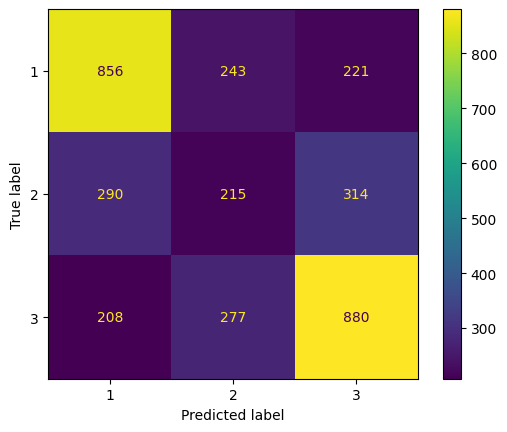

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model_salka_Euros_best,X_test_best,y_test)
#plot_confusion_matrix(model_salka_Euros, X_test, y_test)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting into train and (val + test)
X_train, X_val_test, y_train, y_val_test = train_test_split(
    X, y, test_size=0.25, shuffle=False)

# Splitting val + test into validation and test
X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test, test_size=0.4, shuffle=False)

# Print the sizes of each set
print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Train set: (13140, 8), (13140,)
Validation set: (2628, 8), (2628,)
Test set: (1752, 8), (1752,)


In [ ]:
#þurfum að mappa 123 í 012
y_train_mapped = y_train - 1  # Map [1, 2, 3] to [0, 1, 2]
y_val_mapped = y_val - 1  # Map [1, 2, 3] to [0, 1, 2]
y_test_mapped = y_test - 1  # Map [1, 2, 3] to [0, 1, 2]

In [ ]:
# Calculate class weights
class_counts = y_train_mapped.value_counts()
class_weights = len(y_train_mapped) / (len(class_counts) * class_counts)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

# Apply SMOTE to augment minority class (class 1: draws)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train_mapped)

from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Initialize XGBoost classifier
model = XGBClassifier(objective='multi:softmax', num_class=3)


In [ ]:
import numpy as np

param_grid = {
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'max_depth': np.arange(3, 10),
    'subsample': np.linspace(0.6, 1.0, 10),
    'colsample_bytree': np.linspace(0.6, 1.0, 10),
    'gamma': np.linspace(0, 1, 10),
    'reg_alpha': np.linspace(0, 1, 10),
    'reg_lambda': np.linspace(0, 1, 10)
}

In [ ]:
import random
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Number of iterations
n_iter = 50

# Best score and best parameters initialization
best_score = 0
best_params = {}

# Random search loop
for _ in range(n_iter):
    # Randomly sample hyperparameters
    params = {key: random.choice(value) for key, value in param_grid.items()}

    # Initialize and train the model
    model = XGBClassifier(objective='multi:softmax', num_class=3, **params)
    model.fit(X_resampled, y_resampled)

    # Predict on validation set
    y_pred = model.predict(X_val)

    # Evaluate the model
    score = accuracy_score(y_val_mapped, y_pred)

    # Update best score and parameters
    if score > best_score:
        best_score = score
        best_params = params

print(f"Best score: {best_score}")
print(f"Best parameters: {best_params}")

# Train the final model with the best hyperparameters
best_model = XGBClassifier(objective='multi:softmax', num_class=3, **best_params)
best_model.fit(X_resampled, y_resampled)

# Evaluate the final model
y_prob = best_model.predict_proba(X_val)
y_pred = np.argmax(y_prob, axis=1)

print("Final Model Classification Report:")
print(classification_report(y_val_mapped, y_pred))


Best score: 0.5989345509893456
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.8666666666666667, 'colsample_bytree': 0.9555555555555555, 'gamma': 0.6666666666666666, 'reg_alpha': 0.8888888888888888, 'reg_lambda': 0.7777777777777777}
Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       996
           1       0.33      0.15      0.20       608
           2       0.64      0.72      0.68      1024

    accuracy                           0.60      2628
   macro avg       0.53      0.54      0.52      2628
weighted avg       0.56      0.60      0.57      2628



In [ ]:
import pickle
# Save best parameters to a file
with open('best_params_xgboost.pkl', 'wb') as f:
    pickle.dump(best_params, f)

In [ ]:
with open('best_params_xgboost.pkl', 'rb') as f:
    best_params = pickle.load(f)

In [ ]:
from sklearn.metrics import brier_score_loss
import numpy as np

# Assuming your model is already trained and you have a validation set X_val
probabilities = best_model.predict_proba(X_val)

# Compute the Brier score for each class
brier_scores = []

for class_index in range(probabilities.shape[1]):
    y_true_binary = np.array(y_val_mapped == class_index, dtype=int)  # Create binary labels for the current class
    brier_score = brier_score_loss(y_true_binary, probabilities[:, class_index])
    brier_scores.append(brier_score)

# Average Brier score across all classes
mean_brier_score = np.mean(brier_scores)

print(f"Mean Brier Score: {mean_brier_score}")

Mean Brier Score: 0.20194720424791435


In [ ]:
#skoðum test set
y_prob = best_model.predict_proba(X_test)

# Predict class labels
y_pred = np.argmax(y_prob, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test_mapped, y_pred)
report = classification_report(y_test_mapped, y_pred)

print(f"Test Accuracy: {accuracy}")
print("Test Classification Report:")
print(report)

Test Accuracy: 0.5690639269406392
Test Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.72      0.64       649
           1       0.36      0.15      0.21       415
           2       0.62      0.68      0.65       688

    accuracy                           0.57      1752
   macro avg       0.51      0.52      0.50      1752
weighted avg       0.54      0.57      0.54      1752



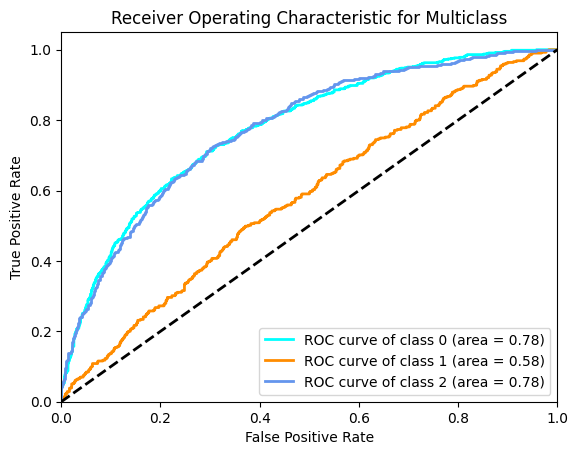

In [ ]:
#skoðum roc curves
import pickle
from xgboost import XGBClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np


# Initialize the model with best parameters
#best_model = XGBClassifier(objective='multi:softmax', num_class=3, **best_params)

# Fit the model on the training data (if not already trained)
#best_model.fit(X_train, y_train)

# Binarize the output
y_test_binarized = label_binarize(y_test_mapped, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
plt.figure()
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pickle

#vista þetta sem ready for prediction, allavega V1
pick_insert = open('drive/My Drive/model_salka_Euros_xgboost.pickle','wb')
pickle.dump(best_model, pick_insert)
pick_insert.close()

In [23]:
#prófum ensemble

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Initialize individual models
brf_model = BalancedRandomForestClassifier(n_estimators=200, random_state=42)
xgb_model = XGBClassifier(objective='multi:softmax', num_class=3, use_label_encoder=False, eval_metric='mlogloss')
knn_model = KNeighborsClassifier(n_neighbors=5)
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
gbm_model = GradientBoostingClassifier(n_estimators=100, random_state=42)



In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Splitting the resampled data into training and validation sets
X_train_res, X_val_res, y_train_res, y_val_res = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [26]:
import numpy as np

# Hyperparameter grids for each model
brf_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

knn_param_grid = {
    'n_neighbors': [3, 10, 20, 30, 40, 50, 60, 70, 80],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

gbc_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}


In [27]:
best_params_brf = {}
best_params_xgb = {}
best_params_knn = {}
best_params_gbc = {}

best_score_brf = 0.0
best_score_xgb = 0.0
best_score_knn = 0.0
best_score_gbc = 0.0


In [28]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import accuracy_score

n_iter = 25

for i in range(n_iter):
    params = {key: np.random.choice(values) for key, values in brf_param_grid.items()}
    brf_model = BalancedRandomForestClassifier(random_state=42, **params)
    brf_model.fit(X_train_res, y_train_res)
    y_val_pred = brf_model.predict(X_val)
    score = accuracy_score(y_val, y_val_pred)
    if score > best_score_brf:
        best_score_brf = score
        best_params_brf = params
    print(f"BRF Iteration {i+1}/{n_iter} - Accuracy: {score}, Params: {params}")

print(f"Best Parameters for BRF: {best_params_brf}")
print(f"Best Accuracy for BRF: {best_score_brf}")


BRF Iteration 1/25 - Accuracy: 0.5277777777777778, Params: {'n_estimators': 200, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto'}
BRF Iteration 2/25 - Accuracy: 0.5182648401826484, Params: {'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
BRF Iteration 3/25 - Accuracy: 0.5247336377473364, Params: {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}
BRF Iteration 4/25 - Accuracy: 0.5331050228310502, Params: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto'}
BRF Iteration 5/25 - Accuracy: 0.5624048706240488, Params: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}
BRF Iteration 6/25 - Accuracy: 0.5365296803652968, Params: {'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_fe

In [29]:
from xgboost import XGBClassifier

for i in range(n_iter):
    params = {key: np.random.choice(values) for key, values in xgb_param_grid.items()}
    xgb_model = XGBClassifier(objective='multi:softmax', num_class=3, use_label_encoder=False, eval_metric='mlogloss', random_state=42, **params)
    xgb_model.fit(X_train_res, y_train_res)
    y_val_pred = xgb_model.predict(X_val)
    score = accuracy_score(y_val, y_val_pred)
    if score > best_score_xgb:
        best_score_xgb = score
        best_params_xgb = params
    print(f"XGB Iteration {i+1}/{n_iter} - Accuracy: {score}, Params: {params}")

print(f"Best Parameters for XGBoost: {best_params_xgb}")
print(f"Best Accuracy for XGBoost: {best_score_xgb}")


XGB Iteration 1/25 - Accuracy: 0.5209284627092846, Params: {'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.7}
XGB Iteration 2/25 - Accuracy: 0.4988584474885845, Params: {'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.2, 'subsample': 0.7, 'colsample_bytree': 0.9}
XGB Iteration 3/25 - Accuracy: 0.5407153729071538, Params: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.7}
XGB Iteration 4/25 - Accuracy: 0.515220700152207, Params: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.2, 'subsample': 0.9, 'colsample_bytree': 0.9}
XGB Iteration 5/25 - Accuracy: 0.5677321156773212, Params: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'subsample': 0.9, 'colsample_bytree': 0.9}
XGB Iteration 6/25 - Accuracy: 0.5993150684931506, Params: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'subsample': 0.9, 'colsample_bytree': 0.7}
XGB Iteration 7/25 - Accurac

In [30]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(n_iter):
    params = {key: np.random.choice(values) for key, values in knn_param_grid.items()}
    knn_model = KNeighborsClassifier(**params)
    knn_model.fit(X_train_res, y_train_res)
    y_val_pred = knn_model.predict(X_val)
    score = accuracy_score(y_val, y_val_pred)
    if score > best_score_knn:
        best_score_knn = score
        best_params_knn = params
    print(f"KNN Iteration {i+1}/{n_iter} - Accuracy: {score}, Params: {params}")

print(f"Best Parameters for KNN: {best_params_knn}")
print(f"Best Accuracy for KNN: {best_score_knn}")


KNN Iteration 1/25 - Accuracy: 0.4901065449010654, Params: {'n_neighbors': 40, 'weights': 'distance', 'metric': 'minkowski'}
KNN Iteration 2/25 - Accuracy: 0.5057077625570776, Params: {'n_neighbors': 50, 'weights': 'distance', 'metric': 'euclidean'}
KNN Iteration 3/25 - Accuracy: 0.4836377473363775, Params: {'n_neighbors': 30, 'weights': 'uniform', 'metric': 'minkowski'}
KNN Iteration 4/25 - Accuracy: 0.4779299847792998, Params: {'n_neighbors': 20, 'weights': 'uniform', 'metric': 'euclidean'}
KNN Iteration 5/25 - Accuracy: 0.5163622526636226, Params: {'n_neighbors': 70, 'weights': 'distance', 'metric': 'euclidean'}
KNN Iteration 6/25 - Accuracy: 0.491248097412481, Params: {'n_neighbors': 30, 'weights': 'uniform', 'metric': 'manhattan'}
KNN Iteration 7/25 - Accuracy: 0.5277777777777778, Params: {'n_neighbors': 80, 'weights': 'uniform', 'metric': 'manhattan'}
KNN Iteration 8/25 - Accuracy: 0.5057077625570776, Params: {'n_neighbors': 50, 'weights': 'uniform', 'metric': 'minkowski'}
KNN It

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

for i in range(n_iter):
    params = {key: np.random.choice(values) for key, values in gbc_param_grid.items()}
    gbc_model = GradientBoostingClassifier(random_state=42, **params)
    gbc_model.fit(X_train_res, y_train_res)
    y_val_pred = gbc_model.predict(X_val)
    score = accuracy_score(y_val, y_val_pred)
    if score > best_score_gbc:
        best_score_gbc = score
        best_params_gbc = params
    print(f"GBC Iteration {i+1}/{n_iter} - Accuracy: {score}, Params: {params}")

print(f"Best Parameters for GBC: {best_params_gbc}")
print(f"Best Accuracy for GBC: {best_score_gbc}")


GBC Iteration 1/25 - Accuracy: 0.5197869101978692, Params: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 7, 'subsample': 1.0}
GBC Iteration 2/25 - Accuracy: 0.5167427701674278, Params: {'n_estimators': 300, 'learning_rate': 0.1, 'max_depth': 7, 'subsample': 0.8}
GBC Iteration 3/25 - Accuracy: 0.5148401826484018, Params: {'n_estimators': 100, 'learning_rate': 0.2, 'max_depth': 7, 'subsample': 0.9}
GBC Iteration 4/25 - Accuracy: 0.5300608828006088, Params: {'n_estimators': 100, 'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.8}
GBC Iteration 5/25 - Accuracy: 0.5235920852359208, Params: {'n_estimators': 200, 'learning_rate': 0.2, 'max_depth': 5, 'subsample': 0.8}
GBC Iteration 6/25 - Accuracy: 0.5224505327245054, Params: {'n_estimators': 200, 'learning_rate': 0.2, 'max_depth': 5, 'subsample': 1.0}
GBC Iteration 7/25 - Accuracy: 0.571917808219178, Params: {'n_estimators': 200, 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 1.0}
GBC Iteration 8/25 - Accuracy: 0.536910197

In [32]:
#vistum best params með pickle
import pickle
# Save best parameters to a file
with open('best_params_brf.pkl', 'wb') as f:
    pickle.dump(best_params_brf, f)

with open('best_params_xgb.pkl', 'wb') as f:
    pickle.dump(best_params_brf, f)

with open('best_params_knn.pkl', 'wb') as f:
    pickle.dump(best_params_brf, f)

with open('best_params_gbc.pkl', 'wb') as f:
    pickle.dump(best_params_brf, f)


print(best_params_brf)
print(best_params_xgb)
print(best_params_knn)
print(best_params_gbc)

{'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto'}
{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01, 'subsample': 0.9, 'colsample_bytree': 0.7}
{'n_neighbors': 80, 'weights': 'uniform', 'metric': 'manhattan'}
{'n_estimators': 200, 'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.8}


Test Accuracy: 0.5570776255707762
Test Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       649
           1       0.32      0.24      0.27       415
           2       0.62      0.66      0.64       688

    accuracy                           0.56      1752
   macro avg       0.51      0.52      0.51      1752
weighted avg       0.54      0.56      0.55      1752



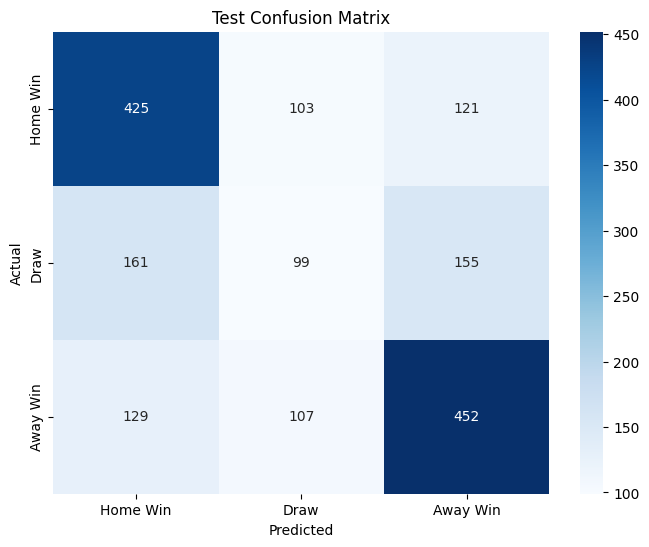

In [33]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize individual models with the best parameters
brf_model = BalancedRandomForestClassifier(random_state=42, **best_params_brf)
xgb_model = XGBClassifier(objective='multi:softmax', num_class=3, use_label_encoder=False, eval_metric='mlogloss', random_state=42, **best_params_xgb)
knn_model = KNeighborsClassifier(**best_params_knn)
gbc_model = GradientBoostingClassifier(random_state=42, **best_params_gbc)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('brf', brf_model),
    ('xgb', xgb_model),
    ('knn', knn_model),
    ('gbc', gbc_model)
], voting='soft')  # 'soft' for probability-based voting

# Train the ensemble model
voting_clf.fit(X_train_res, y_train_res)

# Predict on the test set
y_test_pred = voting_clf.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(test_report)

# Confusion Matrix for Test Set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Home Win', 'Draw', 'Away Win'], yticklabels=['Home Win', 'Draw', 'Away Win'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()



In [34]:
#vistum módel
pick_insert = open('drive/My Drive/model_salka_Euros_ensemble.pickle','wb')
pickle.dump(voting_clf, pick_insert)
pick_insert.close()